In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('loan_approval_dataset.csv')

In [3]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
data.drop(columns = ['loan_id'], inplace=True)

In [5]:
data.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [6]:
data.columns = data.columns.str.strip()

In [7]:
data.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [8]:
data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   no_of_dependents          4269 non-null   int64 
 1   education                 4269 non-null   object
 2   self_employed             4269 non-null   object
 3   income_annum              4269 non-null   int64 
 4   loan_amount               4269 non-null   int64 
 5   loan_term                 4269 non-null   int64 
 6   cibil_score               4269 non-null   int64 
 7   residential_assets_value  4269 non-null   int64 
 8   commercial_assets_value   4269 non-null   int64 
 9   luxury_assets_value       4269 non-null   int64 
 10  bank_asset_value          4269 non-null   int64 
 11  loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


In [11]:
data.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


## Handling missing value

In [12]:
data.isnull().sum()

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

## feature enginnering

In [13]:
data['Assets'] = data.residential_assets_value + data.commercial_assets_value+data.luxury_assets_value + data.bank_asset_value

In [14]:
data.drop(columns = ['residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value'], inplace = True)

In [15]:
data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Assets
0,2,Graduate,No,9600000,29900000,12,778,Approved,50700000
1,0,Not Graduate,Yes,4100000,12200000,8,417,Rejected,17000000
2,3,Graduate,No,9100000,29700000,20,506,Rejected,57700000
3,3,Graduate,No,8200000,30700000,8,467,Rejected,52700000
4,5,Not Graduate,Yes,9800000,24200000,20,382,Rejected,55000000


## clean extra space  on categorical columns

In [16]:
data.education.unique()

array([' Graduate', ' Not Graduate'], dtype=object)

In [17]:
def clean_data(st):
    st = st.strip()
    return st

In [18]:
data.education = data.education.apply(clean_data)

In [19]:
data.self_employed.unique()

array([' No', ' Yes'], dtype=object)

In [21]:
data.self_employed = data.self_employed.apply(clean_data)

In [22]:
data.loan_status.unique()

array([' Approved', ' Rejected'], dtype=object)

In [23]:
data.loan_status = data.loan_status.apply(clean_data)

## EDA on bank loan dataset

In [36]:
categotical_columns=data.select_dtypes(include="object").columns 
numerical_columns=data.select_dtypes(include=['int64']).columns

In [30]:
data['loan_status'].value_counts()

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

## 📊 Univariate Analysis on categorical columns

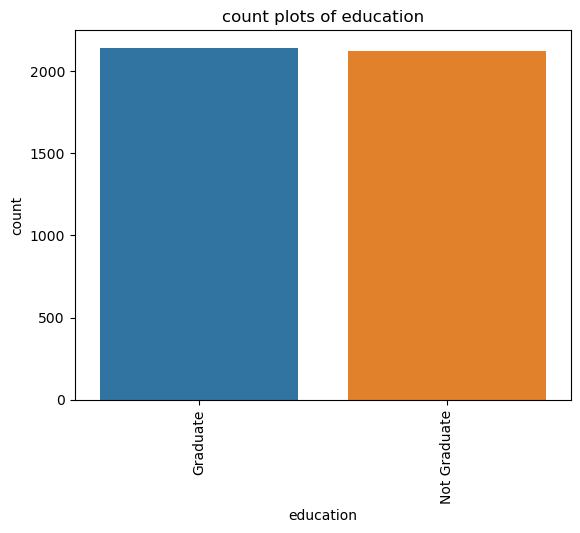

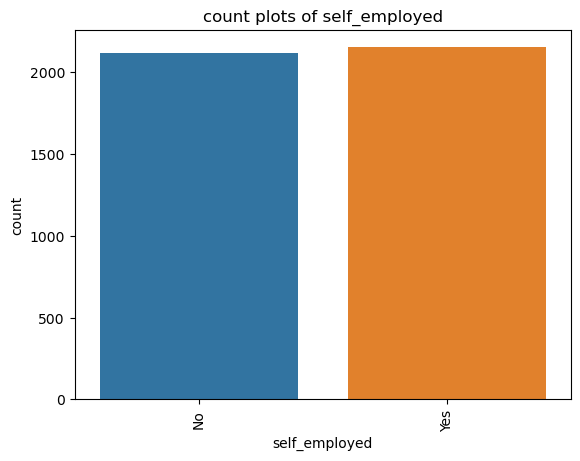

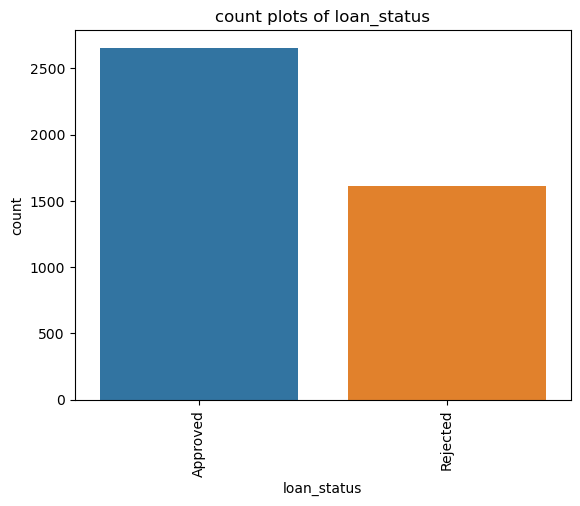

In [38]:
for cat in categotical_columns:
 if cat !='Item_Identifier':
    sns.countplot(data=data,x=cat,hue=cat)
    plt.title(f'count plots of {cat}')
    plt.xticks(rotation=90)
    plt.show()


### 📊  Bivariate analysis 

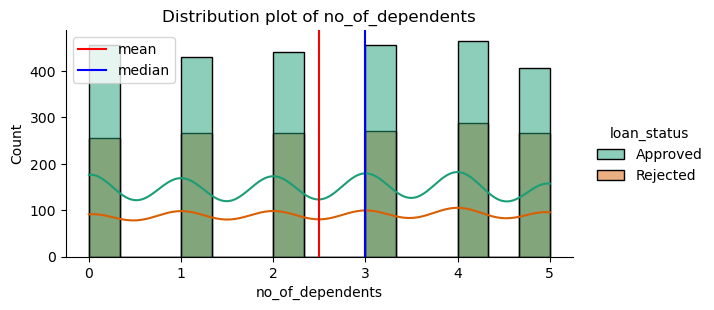

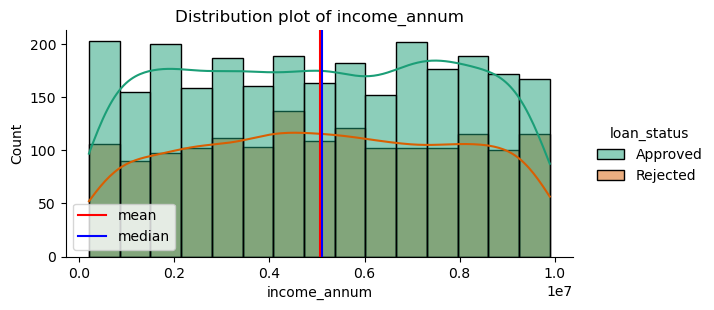

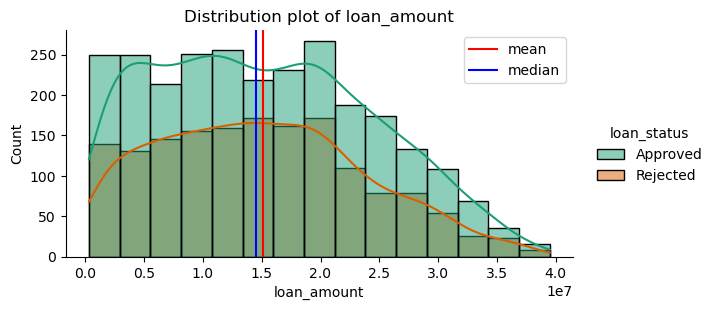

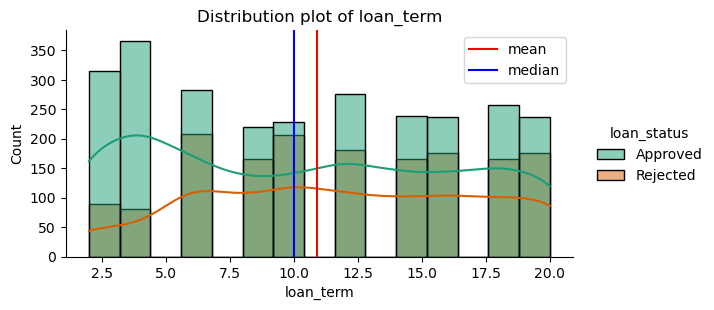

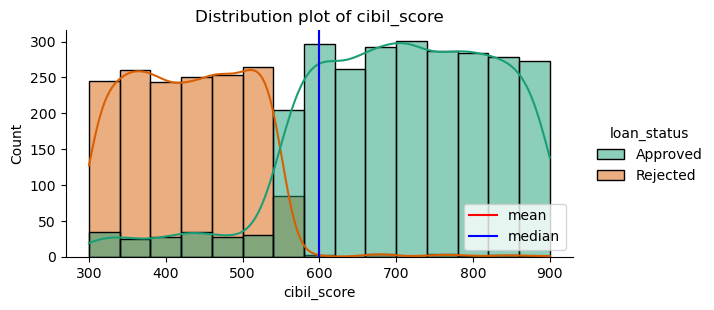

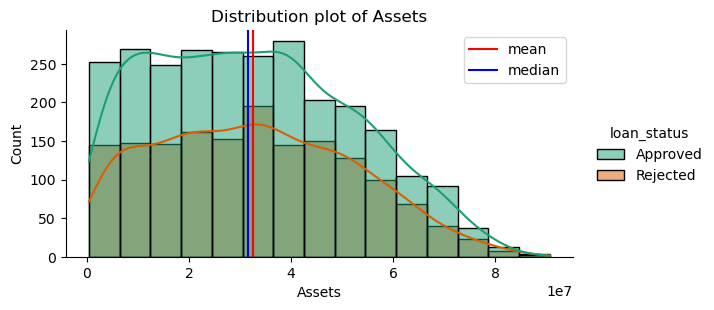

In [66]:
for num in numerical_columns:
    sns.displot(data=data, x=num, hue="loan_status" ,bins=15, height=3, aspect=2, kde=True,palette="Dark2")
    plt.axvline(data[num].mean(), label='mean', c='r')
    plt.axvline(data[num].median(), label='median', c='b')
    plt.title(f'Distribution plot of {num}')
    plt.legend()
    plt.show()

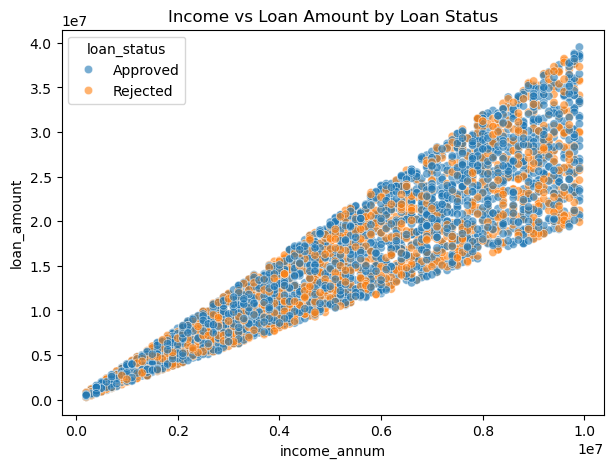

In [45]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=data, x="income_annum", y="loan_amount", hue="loan_status", alpha=0.6)
plt.title("Income vs Loan Amount by Loan Status")
plt.show()


In [46]:
## Higher-income applicants tend to request larger loans and are more likely to be approved.
## Rejections are common when loan amounts are high relative to income, indicating risk sensitivity.

In [62]:
data.head(1)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Assets
0,2,Graduate,No,9600000,29900000,12,778,Approved,50700000


Text(0.5, 1.0, 'Education vs. Loan Status')

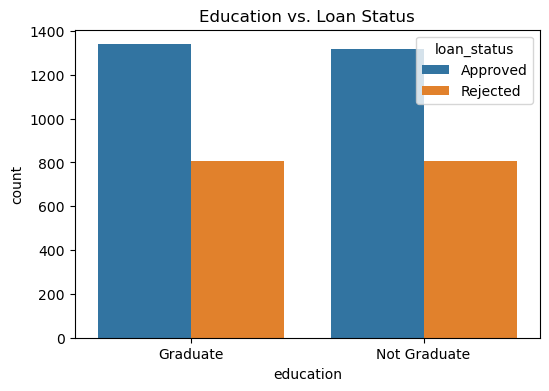

In [55]:
# Education vs. Loan Status
plt.figure(figsize=(6, 4))
sns.countplot(x='education', hue='loan_status', data=data)
plt.title('Education vs. Loan Status')

Text(0.5, 1.0, 'self_employed\t vs. Loan Status')

C:\Users\Lenovo\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
C:\Users\Lenovo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


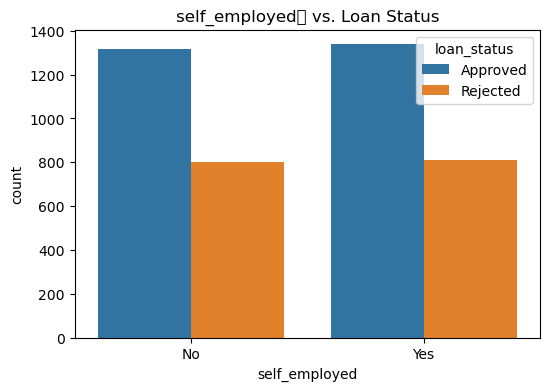

In [54]:
# Education vs. Loan Status
plt.figure(figsize=(6, 4))
sns.countplot(x='self_employed', hue='loan_status', data=data)
plt.title('self_employed	 vs. Loan Status')

## Correlation Matrix of Numerical Features

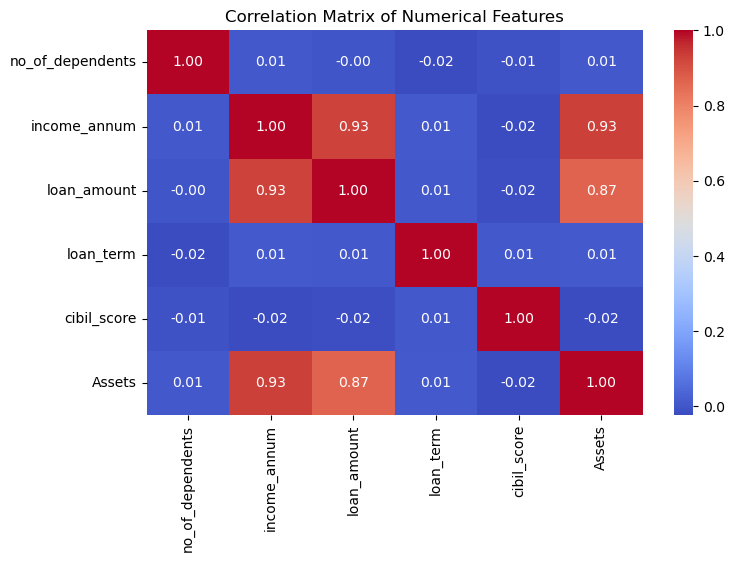

In [71]:
corr_matrix = data[numerical_columns].corr()
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Outlier Detection for numerical features

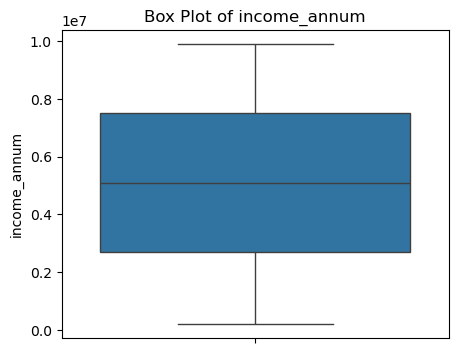

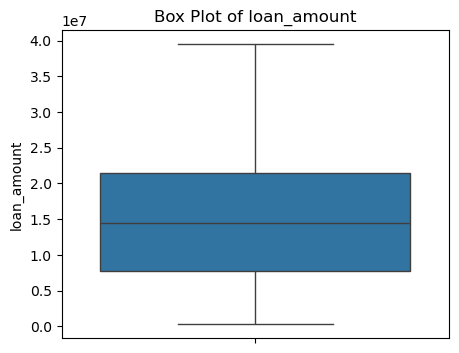

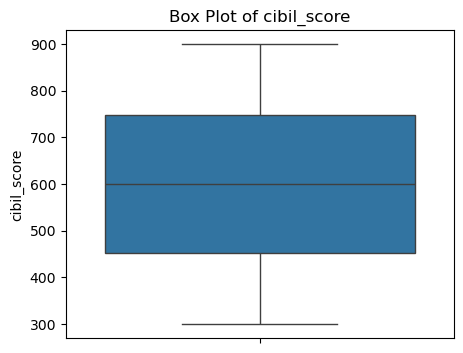

In [77]:
for col in ['income_annum', 'loan_amount', 'cibil_score']:
    plt.figure(figsize=(5, 4))
    sns.boxplot(y=col, data=data)
    plt.title(f'Box Plot of {col}')
    plt.show()

### Data preprocssing

In [82]:
## encoding :-categotical_columns[education	,self_employed	,loan_status]
### scalling on - Numerical columns
data.head(1)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Assets
0,2,Graduate,No,9600000,29900000,12,778,Approved,50700000


In [83]:
data.loan_status = data.loan_status.replace(['Approved', 'Rejected'],[1,0])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22100\697167504.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.loan_status = data.loan_status.replace(['Approved', 'Rejected'],[1,0])


In [84]:
data.self_employed = data.self_employed.replace(['No', 'Yes'],[0,1])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22100\864554684.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.self_employed = data.self_employed.replace(['No', 'Yes'],[0,1])


In [85]:
data['education'] = data['education'].replace(['Graduate', 'Not Graduate'],[1,0])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22100\94172871.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['education'] = data['education'].replace(['Graduate', 'Not Graduate'],[1,0])


In [87]:
data.head(3)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Assets
0,2,1,0,9600000,29900000,12,778,1,50700000
1,0,0,1,4100000,12200000,8,417,0,17000000
2,3,1,0,9100000,29700000,20,506,0,57700000


In [88]:
x=data.drop(columns="loan_status")

In [90]:
y=data["loan_status"]

In [91]:
x.shape,y.shape

((4269, 8), (4269,))

In [93]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [95]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3415, 8), (854, 8), (3415,), (854,))

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [101]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns=x.columns)

In [107]:
X_train_scaled.head(3)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,Assets
0,1.512508,-1.002639,-1.015047,1.009500,1.624772,-0.860003,-0.187401,0.601127
1,-1.435001,-1.002639,0.985176,1.614171,2.077128,0.188894,0.637397,2.428704
2,-0.845499,0.997368,-1.015047,-1.515891,-1.354157,-0.510371,0.474761,-1.313477


In [106]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns=x.columns)
X_test_scaled.head(3)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,Assets
0,1.512508,0.997368,-1.015047,0.120278,0.499399,1.587423,-1.029623,0.355403
1,-0.255997,0.997368,-1.015047,0.298122,-0.129486,-0.510371,-0.007339,0.314449
2,0.333504,0.997368,-1.015047,1.614171,0.521465,0.538526,-0.861179,1.174485


### Train model

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [109]:
# Initialize models
lr_model = LogisticRegression()
rf_model = RandomForestClassifier(random_state=42)
dt_model = DecisionTreeClassifier(max_depth=5)
gb_model = GradientBoostingClassifier(random_state=42, learning_rate=0.1)
xgb_model =  XGBClassifier(random_state=42, learning_rate=0.1)

In [110]:
# Train models
lr_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)
dt_model.fit(X_train_scaled, y_train)
gb_model.fit(X_train_scaled, y_train)
xgb_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

## Evaluate the metric Model.

In [111]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report

In [112]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        'accuracy_score': accuracy_score(y_test, y_pred),
        'precision_score': precision_score(y_test, y_pred),
        'recall_score': recall_score(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred)
        
        
    }

In [114]:
lr_results = evaluate_model(lr_model, X_test_scaled, y_test)
rf_results = evaluate_model(rf_model, X_test_scaled, y_test)
dt_results=  evaluate_model(dt_model, X_test_scaled, y_test)
gb_results=  evaluate_model(gb_model, X_test_scaled, y_test)
xgb_reults=  evaluate_model(xgb_model, X_test_scaled, y_test)
print("Logistic Regression:", lr_results)
print()


print("Random Forest:", rf_results)

print()

print("Decision Tree :", dt_results)


print()

print("Gradient Boosting:", gb_results)

print()

print("XGBoost :", xgb_reults)

Logistic Regression: {'accuracy_score': 0.905152224824356, 'precision_score': 0.9189686924493554, 'recall_score': 0.9309701492537313, 'confusion_matrix': array([[274,  44],
       [ 37, 499]], dtype=int64), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.88      0.86      0.87       318\n           1       0.92      0.93      0.92       536\n\n    accuracy                           0.91       854\n   macro avg       0.90      0.90      0.90       854\nweighted avg       0.90      0.91      0.90       854\n'}

Random Forest: {'accuracy_score': 0.9754098360655737, 'precision_score': 0.9742173112338858, 'recall_score': 0.9869402985074627, 'confusion_matrix': array([[304,  14],
       [  7, 529]], dtype=int64), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.98      0.96      0.97       318\n           1       0.97      0.99      0.98       536\n\n    accuracy                    

In [115]:
## Xgboost is my best model

In [127]:

new_data= pd.DataFrame([['2','1','0','9600000','29900000','12','778','50700000']],columns=x.columns)

In [128]:
new_data= scaler.transform(new_data)

In [129]:
xgb_model.predict(new_data)

array([1])

In [130]:
import pickle as pk

In [134]:
pk.dump(xgb_model, open('loan_model.pkl','wb'))

In [135]:
pk.dump(scaler,open('loan_scaler.pkl','wb'))